In [1]:
import fileinput

for line in fileinput.FileInput("chosen_audiograms.txt",inplace=1):
    if line.rstrip():
        print(line)
        
data = open('chosen_audiograms.txt').read().replace('\n', '#')
data=[data]

with open('readme.txt', 'w') as f:
    for line in data:
        f.write(line)
        f.write('\n')
        
file_name = 'readme.txt'
with open(file_name, 'r') as f:
    file_content = f.read().replace(':','').replace('Level','\nLevel')
with open(file_name, 'w') as f:
    f.write(file_content)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
df=pd.read_table('readme.txt',header=None)
df.columns
df.to_csv('df.csv') 
df=pd.read_csv('df.csv' , sep=',' , header=None)
df.columns = df.iloc[0]
df=pd.DataFrame(df)
df=df.drop(df.index[0])
df=df['0']

NameError: name 'pd' is not defined

In [55]:
df.columns=['id']
df=pd.DataFrame(df)
df1=pd.DataFrame(df.id.str.split('##', expand=True))
df1 = df1.iloc[:, :-1]
df1

,0,1,2,3,4,5,6
1,Level 4,Patient 10,"[22, 18, 12, 16, 22, 30, 34, 26, 30, 44, 72]",Patient 18,"[10, 8, 12, 14, 20, 20, 34, 42, 48, 56, 52]",Moyenne Humes,"[7, 8, 11, 13, 15, 19, 24, 32, 40, 52, 56]"
2,Level 5,Patient 01,"[26, 24, 24, 26, 30, 38, 46, 46, 48, 64, 60]",Patient 07,"[32, 32, 38, 38, 36, 44, 44, 56, 54, 78, 76]",Moyenne Humes,"[18, 19, 21, 23, 25, 29, 33, 40, 46, 55, 58]"
3,Level 6,Patient 02,"[18, 14, 12, 16, 20, 48, 58, 68, 72, 82, 76]",Patient 03,"[20, 20, 26, 34, 38, 42, 54, 70, 74, 74, 70]",Moyenne Humes,"[6, 9, 16, 22, 28, 39, 47, 60, 68, 73, 72]"
4,Level 7,Patient 04,"[16, 16, 36, 38, 42, 42, 40, 60, 68, 70, 68]",Patient 05,"[26, 32, 32, 46, 48, 50, 62, 62, 68, 66, 68]",Moyenne Humes,"[34, 36, 40, 43, 46, 52, 56, 63, 68, 73, 77]"


In [57]:
df1.columns=['1','2','3','4','5','6','7']
origine=df1.melt(id_vars=['1','3','5','7'], 
        var_name="Methods", 
        value_name="origine")
origine=origine[['1','origine']]
origine.columns=['id_audiogramme','origine']
frequence=df1.melt(id_vars=['1','2','4','6'], 
        var_name="Methods", 
        value_name="frequence")
frequence=frequence[['1','frequence']]
frequence.columns=['id_audiogramme','frequence']
df_fin=pd.concat([origine, frequence], axis=1)
df_fin.columns=['id_audiogramme','origine',"del","frequence"]
del df_fin['del']
df_fin["frequence"] = df_fin.frequence.str.replace(']','')
df_fin["frequence"] = df_fin.frequence.str.replace('[','')
freq=df_fin["frequence"].str.split(pat=",", expand=True)
df_fin=pd.concat([df_fin, freq], axis=1)
del df_fin['frequence']

/Users/Aynaz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  from ipykernel import kernelapp as app
/Users/Aynaz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  app.launch_new_instance()


In [58]:
df_fin.columns=['id_audiogramme','origine',"0.125","0.25","0.5","0.75","1","1.5","2",
    "3","4","6","8"]
df_fin=df_fin.melt(id_vars=['id_audiogramme','origine'], 
        var_name="Frequency", 
        value_name="Audiometric Threshold")
df_fin.columns=['Warhics Level','Origin','Frequency',"Audiometric Threshold"]
df_fin.replace({'Origin':{'Patient 10': 'Participant 1','Patient 01': 'Participant 2','Patient 02': 'Participant 3','Patient 04': 'Participant 4','Patient 18': 'Participant 5','Patient 07': 'Participant 6','Patient 03': 'Participant 7','Patient 05': 'Participant 8','Moyenne Humes': 'Humes 2021'}}, inplace = True)
df_fin[["Audiometric Threshold","Frequency"]] = df_fin[["Audiometric Threshold","Frequency"]].apply(pd.to_numeric)
df_fin.columns=['WARHICS levels:','Audiograms:','Frequency',"Audiometric Threshold"]
df_fin.replace({'Audiograms:':{'Humes 2021': 'Mean audiograms from Humes (2021)'}}, inplace = True)
df_fin
df_fin.to_csv('df_fin.csv') 
df_fin

,Warhics Level,Origin,Frequency,Audiometric Threshold
0,Level 4,Participant 1,0.125,22
1,Level 5,Participant 2,0.125,26
2,Level 6,Participant 3,0.125,18
3,Level 7,Participant 4,0.125,16
4,Level 4,Participant 5,0.125,10
...,...,...,...,...
127,Level 7,Participant 8,8,68
128,Level 4,Humes 2021,8,56
129,Level 5,Humes 2021,8,58
130,Level 6,Humes 2021,8,72


In [183]:
# import data into pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
df_fin = pd.read_csv('df_fin.csv' , sep=',' , header=None)
df_fin.columns = df_fin.iloc[0]
df_fin=pd.DataFrame(df_fin)
df_fin=df_fin.drop(df_fin.index[0])
df_fin=df_fin.iloc[:, 1:]
# check records
df_fin

,WARHICS levels:,Audiograms:,Frequency,Audiometric Threshold
1,Level 4,Participant 1,0.125,22
2,Level 5,Participant 2,0.125,26
3,Level 6,Participant 3,0.125,18
4,Level 7,Participant 4,0.125,16
5,Level 4,Participant 5,0.125,10
...,...,...,...,...
128,Level 7,Participant 8,8.0,68
129,Level 4,Mean audiograms from Humes (2021),8.0,56
130,Level 5,Mean audiograms from Humes (2021),8.0,58
131,Level 6,Mean audiograms from Humes (2021),8.0,72


In [193]:
df_fin.to_csv('df_fin.csv') 

In [184]:
df_fin.replace({'Audiograms:':{ 'Participant 2':'Participant 3','Participant 3':'Participant 5', 'Participant 4':'Participant 7','Participant 5':'Participant 2', 'Participant 6':'Participant 4','Participant 7':'Participant 6'}}, inplace = True)
df_fin

,WARHICS levels:,Audiograms:,Frequency,Audiometric Threshold
1,Level 4,Participant 1,0.125,22
2,Level 5,Participant 3,0.125,26
3,Level 6,Participant 5,0.125,18
4,Level 7,Participant 7,0.125,16
5,Level 4,Participant 2,0.125,10
...,...,...,...,...
128,Level 7,Participant 8,8.0,68
129,Level 4,Mean audiograms from Humes (2021),8.0,56
130,Level 5,Mean audiograms from Humes (2021),8.0,58
131,Level 6,Mean audiograms from Humes (2021),8.0,72


In [189]:
df_fin[["Audiometric Threshold","Frequency"]] = df_fin[["Audiometric Threshold","Frequency"]].apply(pd.to_numeric)
df_fin.dtypes

0
WARHICS levels:           object
Audiograms:               object
Frequency                float64
Audiometric Threshold      int64
size                     float64
dtype: object

In [164]:
def f(row):
    if row['Audiograms:'] == 'Paricipant 1':
        val = 1
    elif row['Audiograms:'] =='Paricipant 2':
        val = 1
        elif row['Audiograms:'] =='Paricipant 3':
            val = 1
            elif row['Audiograms:'] =='Paricipant 4':
                val = 1 
                elif row['Audiograms:'] =='Paricipant 5':
                    val = 1
                    elif row['Audiograms:'] =='Paricipant 6':
                        val = 1
                        elif row['Audiograms:'] =='Paricipant 7':
                            val = 1
                            elif row['Audiograms:'] =='Paricipant 8':
                            val = 1    
    else:
        val = 2
    return val
df_fin['size'] = df_fin.apply(f, axis=1)

In [185]:
df_fin.loc[df_fin['Audiograms:'] == 'Paricipant 1', 'size'] = 1
df_fin.loc[df_fin['Audiograms:'] == 'Paricipant 2', 'size'] = 1
df_fin.loc[df_fin['Audiograms:'] == 'Paricipant 3', 'size'] = 1
df_fin.loc[df_fin['Audiograms:'] == 'Paricipant 4', 'size'] = 1
df_fin.loc[df_fin['Audiograms:'] == 'Paricipant 5', 'size'] = 1
df_fin.loc[df_fin['Audiograms:'] == 'Paricipant 6', 'size'] = 1
df_fin.loc[df_fin['Audiograms:'] == 'Paricipant 7', 'size'] = 1
df_fin.loc[df_fin['Audiograms:'] == 'Paricipant 8', 'size'] = 1
df_fin.loc[df_fin['Audiograms:'] == 'Mean audiograms from Humes (2021)', 'size'] = 2

In [186]:
df_fin['size']=df_fin['size'].fillna(1)

In [187]:
df_fin

,WARHICS levels:,Audiograms:,Frequency,Audiometric Threshold,size
1,Level 4,Participant 1,0.125,22,1.0
2,Level 5,Participant 3,0.125,26,1.0
3,Level 6,Participant 5,0.125,18,1.0
4,Level 7,Participant 7,0.125,16,1.0
5,Level 4,Participant 2,0.125,10,1.0
...,...,...,...,...,...
128,Level 7,Participant 8,8.0,68,1.0
129,Level 4,Mean audiograms from Humes (2021),8.0,56,2.0
130,Level 5,Mean audiograms from Humes (2021),8.0,58,2.0
131,Level 6,Mean audiograms from Humes (2021),8.0,72,2.0


In [212]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
def subtitle_legend(ax, legend_format):
    new_handles = []
    
    handles, labels = ax.get_legend_handles_labels()
    label_dict = dict(zip(labels, handles))
    
    #Means 2 labels were the same
    if len(label_dict) != len(labels):
        raise ValueError("Can not have repeated levels in labels!")
    
    for subtitle, level_order in legend_format.items():
        #Roll a blank handle to add in the subtitle
        blank_handle = matplotlib.patches.Patch(visible=False, label=subtitle)
        new_handles.append(blank_handle)
        
        for level in level_order:
            handle = label_dict[level]
            new_handles.append(handle)

    #Labels are populated from handle.get_label() when we only supply handles as an arg
    legend = ax.legend(handles=new_handles)

    #Turn off DrawingArea visibility to left justify the text if it contains a subtitle
    for draw_area in legend.findobj(matplotlib.offsetbox.DrawingArea):
        for handle in draw_area.get_children():
            if handle.get_label() in legend_format:
                draw_area.set_visible(False)

    return legend

In [220]:
df_fin

,WARHICS levels:,Audiograms:,Frequency,Audiometric Threshold,size
1,Level 4,Participant 1,0.125,22,1.0
2,Level 5,Participant 3,0.125,26,1.0
3,Level 6,Participant 5,0.125,18,1.0
4,Level 7,Participant 7,0.125,16,1.0
5,Level 4,Participant 2,0.125,10,1.0
...,...,...,...,...,...
128,Level 7,Participant 8,8.000,68,1.0
129,Level 4,Mean audiograms from Humes (2021),8.000,56,2.0
130,Level 5,Mean audiograms from Humes (2021),8.000,58,2.0
131,Level 6,Mean audiograms from Humes (2021),8.000,72,2.0


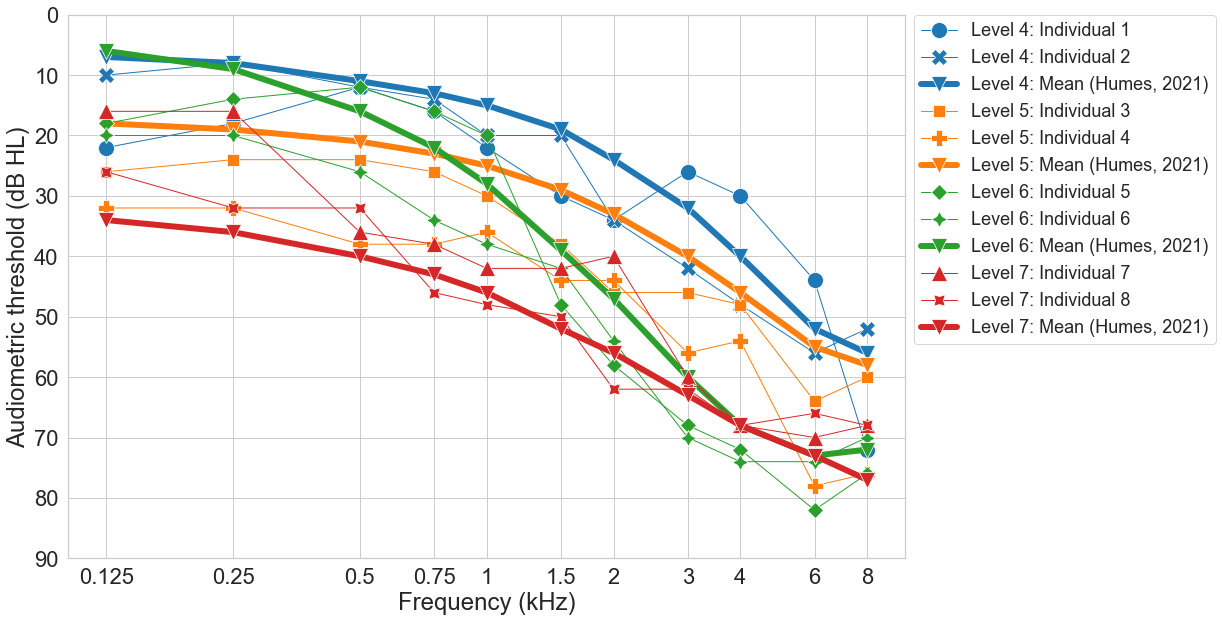

In [249]:
ticks=[.125,.25,.5,.75,1,1.5,2,3,4,6,8]
labels = [i for i in ticks]
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15, 10))
sns.set_context("notebook", font_scale=2, rc={"lines.linew3idth": 4})

g=sns.lineplot(
    data=df_fin,
    x="Frequency", y="Audiometric Threshold", hue="WARHICS levels:",style='Audiograms:',size='Audiograms:' ,markers=True, dashes=False,markersize=16,sizes={'Participant 1':1, 'Participant 2':1,'Participant 3':1,'Participant 4':1,'Participant 5':1,'Participant 6':1,'Participant 7':1,'Participant 8':1,'Mean audiograms from Humes (2021)':6})

ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Audiometric threshold (dB HL)')
ax.legend(bbox_to_anchor=(1.01, 1),markerscale=1, fontsize=18,
          borderaxespad=0,labels=['Level 4: Individual 1', 'Level 4: Individual 2','Level 4: Mean (Humes, 2021)','Level 5: Individual 3','Level 5: Individual 4','Level 5: Mean (Humes, 2021)','Level 6: Individual 5','Level 6: Individual 6','Level 6: Mean (Humes, 2021)','Level 7: Individual 7','Level 7: Individual 8','Level 7: Mean (Humes, 2021)'])

#g.set_axis_labels("Frequence (kHz)", "Seuil Audiométrique (dBHL)")
g.set(ylim=(90,0),xscale="log",xticks = ticks,xticklabels = labels)

plt.savefig('Audiograms.png', dpi=300, bbox_inches='tight')
plt.savefig('Audiograms.svg', bbox_inches='tight')
plt.show()
#size="Audiograms:"

In [214]:
df_fin['Audiograms:'] = df_fin['Audiograms:'].astype(pd.CategoricalDtype(categories=['Participant 1', 'Participant 2','Participant 3','Participant 4','Participant 5','Participant 6','Participant 7','Participant 8','Mean audiograms from Humes (2021)'],ordered=False))

In [142]:
df_fin.replace({'Audiograms:':{'Participant 1':' 1',
 'Participant 2': '2',
 'Participant 3': '3',
 'Participant 4': '4',
 'Participant 5': '5',
 'Participant 6': '6',
 'Participant 7': '7',
 'Participant 8': '8',
 'Mean audiograms from Humes (2021)':'9' }}, inplace = True)
df_fin
legend_format = {'WARHICS levels:': ['Level 4', 'Level 5','Level 6','Level 7'],
                     'Audiograms:': ['Participant 1', 'Participant 2','Participant 3','Participant 4','Participant 5','Participant 6','Participant 7','Participant 8','Mean audiograms from Humes (2021)']
                    }

subtitle_legend(g, legend_format=legend_format)
,labels=['Level4: Pariticpant 1','Level4: Pariticpant 2','Level4: Mean audiograms from Humes (2021)','Level5: Pariticpant 3','Level5: Pariticpant 4','Level5: Mean audiograms from Humes (2021)','Level6: Pariticpant 5','Level6: Pariticpant 6','Level6: Mean audiograms from Humes (2021)','Level7: Pariticpant 7','Level7: Pariticpant 8','Level7: Mean audiograms from Humes (2021)'

,WARHICS levels:,Audiograms:,Frequency,Audiometric Threshold
1,Level 4,1,0.125,22
2,Level 5,3,0.125,26
3,Level 6,5,0.125,18
4,Level 7,7,0.125,16
5,Level 4,2,0.125,10
...,...,...,...,...
128,Level 7,8,8.000,68
129,Level 4,9,8.000,56
130,Level 5,9,8.000,58
131,Level 6,9,8.000,72


In [144]:
sizes = {a:a for a in df_fin['Audiograms:'].unique()}
sizes

{' 1': ' 1',
 '3': '3',
 '5': '5',
 '7': '7',
 '2': '2',
 '4': '4',
 '6': '6',
 '8': '8',
 '9': '9'}

In [181]:
list_ordering = ['Level 4','Level 5','Level 6','Level 7']  
df_fin["WARHICS levels:"] = pd.Categorical(df_fin["WARHICS levels:"], categories=list_ordering)
df_fin.sort_values(by = "WARHICS levels:",inplace=True)
df_fin

,WARHICS levels:,Audiograms:,Frequency,Audiometric Threshold,size
1,Level 4,Participant 1,0.125,22,1.0
25,Level 4,Participant 1,0.500,12,1.0
93,Level 4,Mean audiograms from Humes (2021),3.000,32,2.0
29,Level 4,Participant 2,0.500,12,1.0
89,Level 4,Participant 2,3.000,42,1.0
...,...,...,...,...,...
72,Level 7,Mean audiograms from Humes (2021),1.500,52,2.0
108,Level 7,Mean audiograms from Humes (2021),4.000,68,2.0
32,Level 7,Participant 8,0.500,32,1.0
76,Level 7,Participant 7,2.000,40,1.0


In [180]:
df_fin

,WARHICS levels:,Audiograms:,Frequency,Audiometric Threshold,size
1,Level 4,Participant 1,0.125,22,1.0
2,Level 5,Participant 3,0.125,26,1.0
3,Level 6,Participant 5,0.125,18,1.0
4,Level 7,Participant 7,0.125,16,1.0
5,Level 4,Participant 2,0.125,10,1.0
...,...,...,...,...,...
128,Level 7,Participant 8,8.000,68,1.0
129,Level 4,Mean audiograms from Humes (2021),8.000,56,2.0
130,Level 5,Mean audiograms from Humes (2021),8.000,58,2.0
131,Level 6,Mean audiograms from Humes (2021),8.000,72,2.0


In [94]:
df_fin[["WARHICS levels:","Audiograms:"]].groupby(["WARHICS levels:"]).count()

,Audiograms:
WARHICS levels:,
Level 4,33
Level 5,33
Level 6,33
Level 7,33


In [66]:
import string
with open('chosen_audiograms.txt', 'w') as f:
      for line in data:
        print(line[:string.find(line," [")])

AttributeError: module 'string' has no attribute 'find'